In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
target_col = 'Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId','Name','Ticket','Cabin']

Univariate Analysis

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


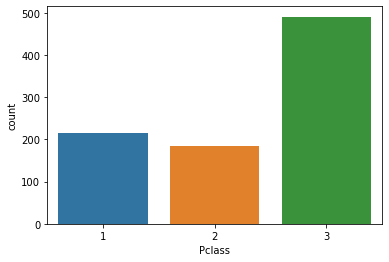

Sex
female    314
male      577
Name: Sex, dtype: int64


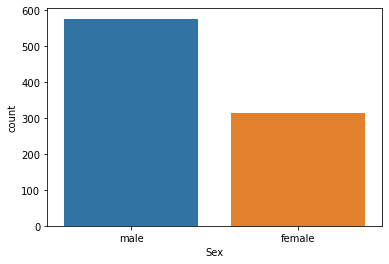

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


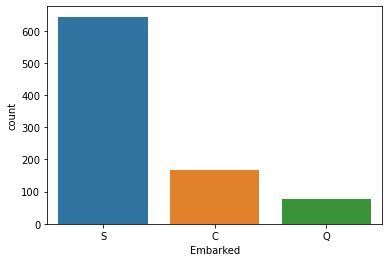

In [20]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data = df, x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

Age


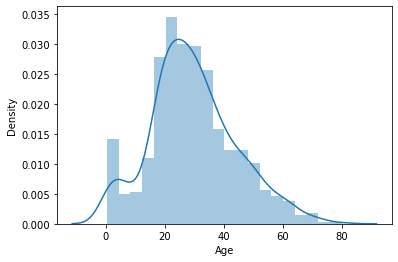

SibSp


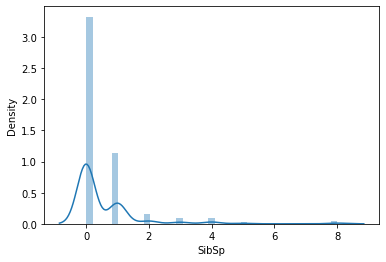

Parch


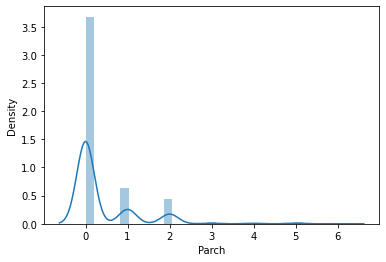

Fare


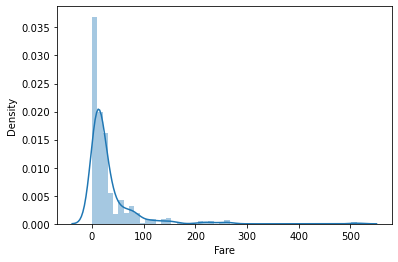

In [21]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)

Bivariate Analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


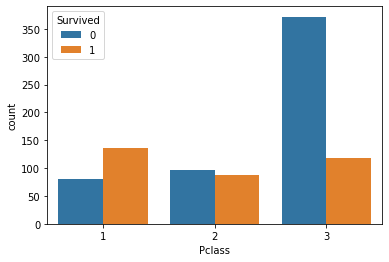

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


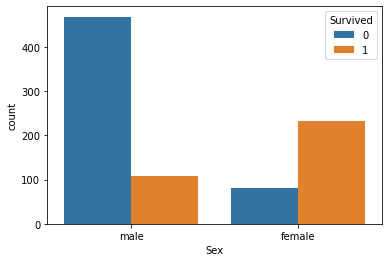

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


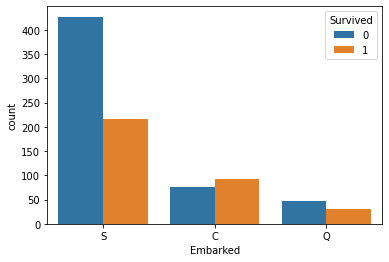

In [22]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

Age


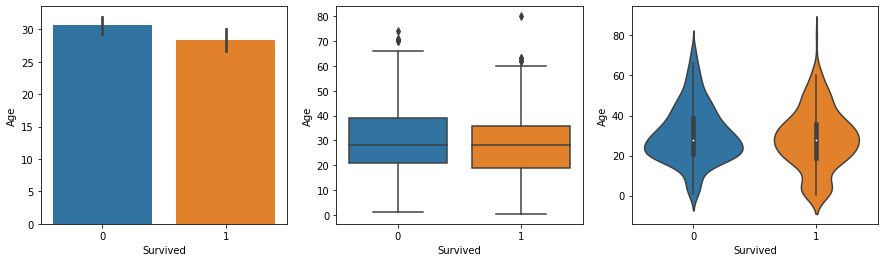

SibSp


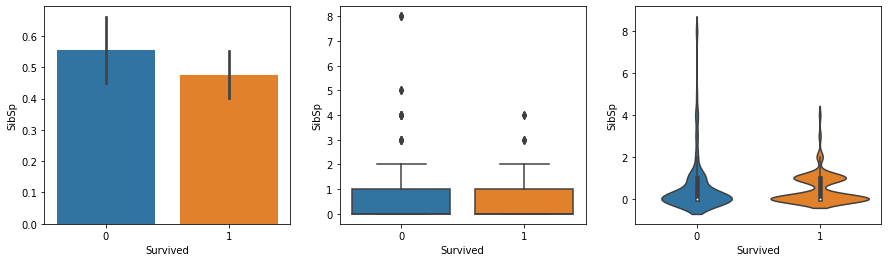

Parch


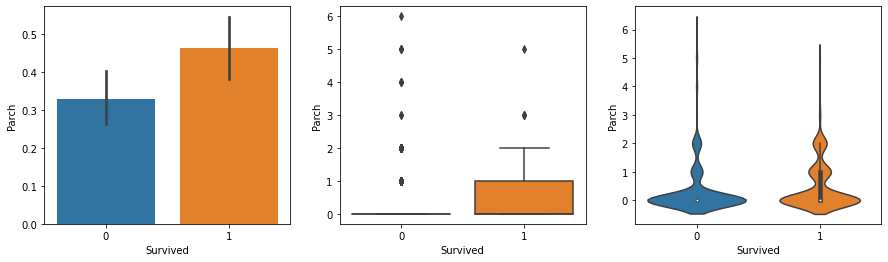

Fare


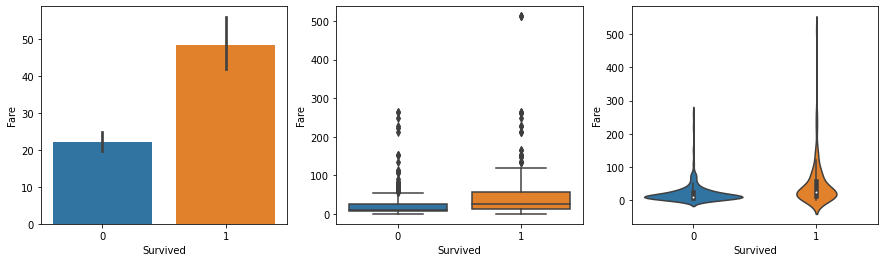

In [23]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)    
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_col, y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

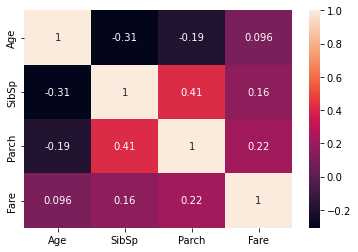

In [24]:
sns.heatmap(df[num_cols].corr(),annot=True)

multivariate

In [25]:
from random import choice
p_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

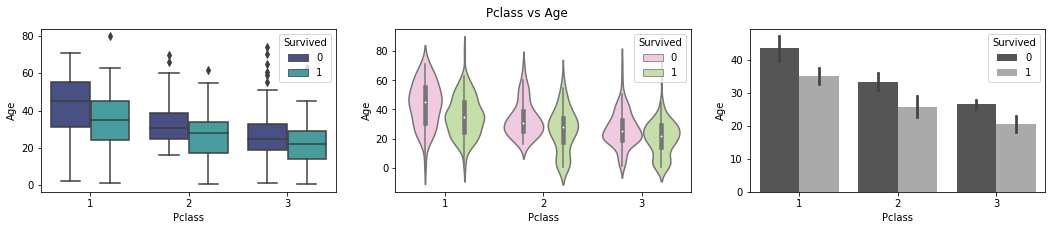

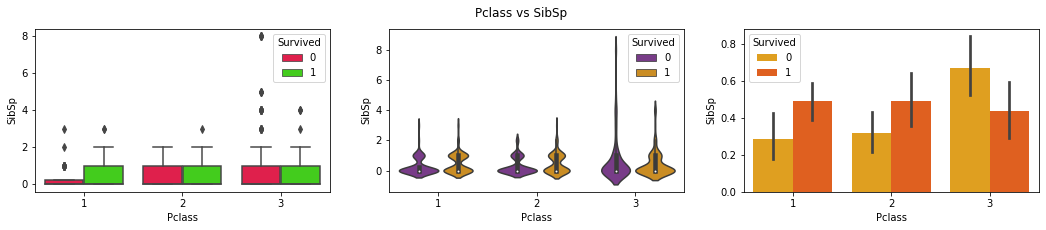

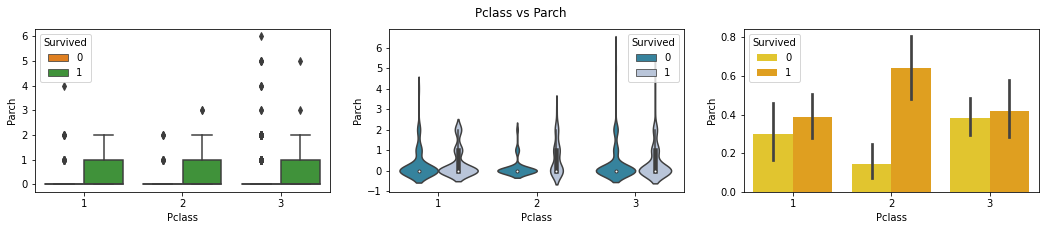

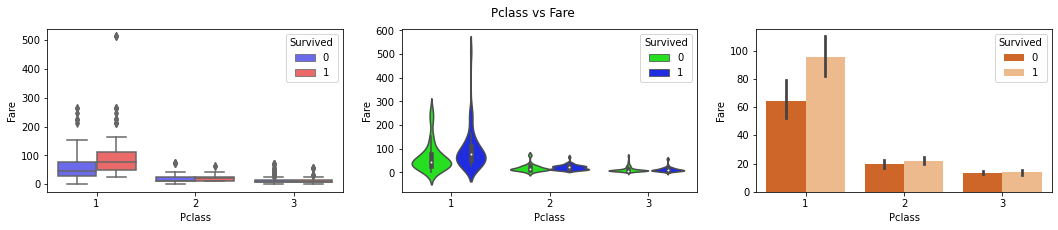

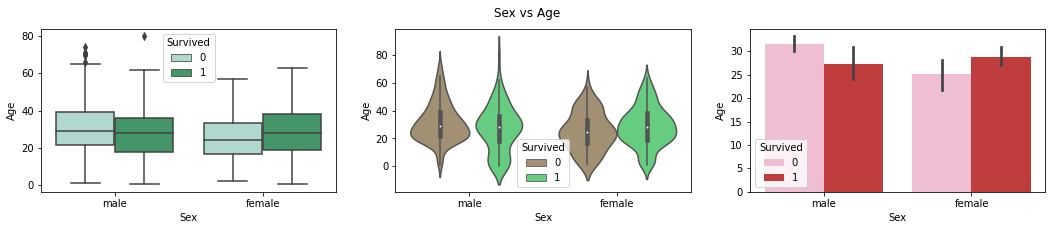

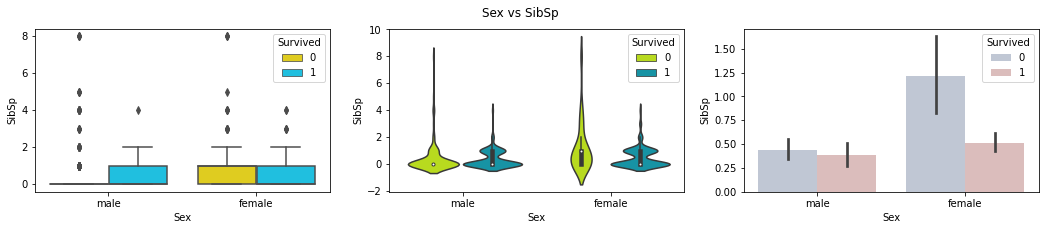

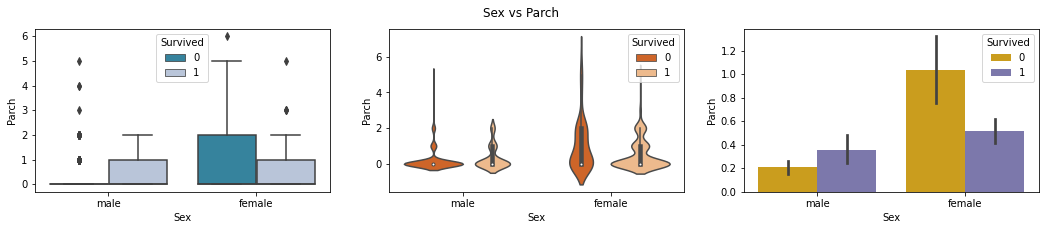

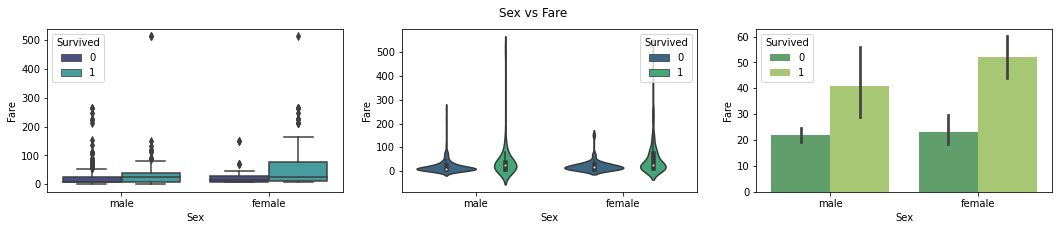

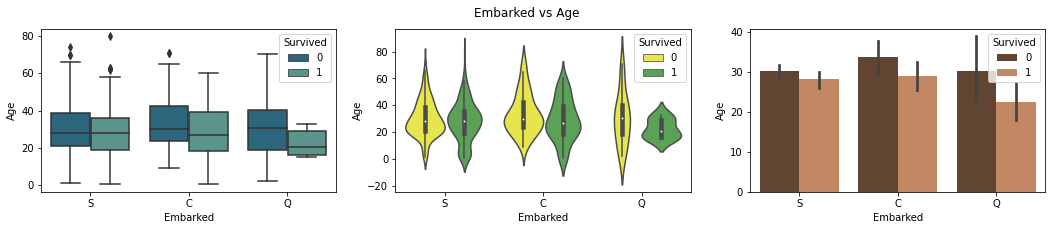

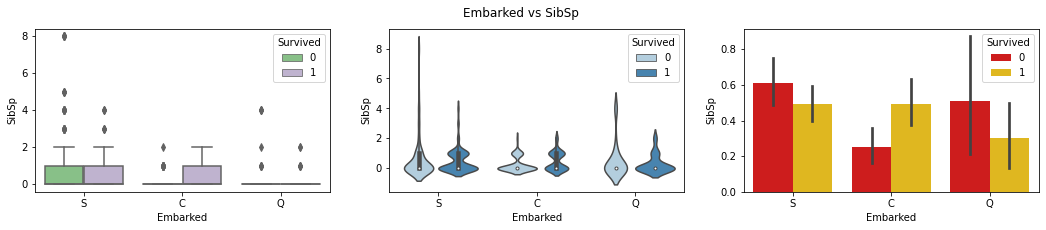

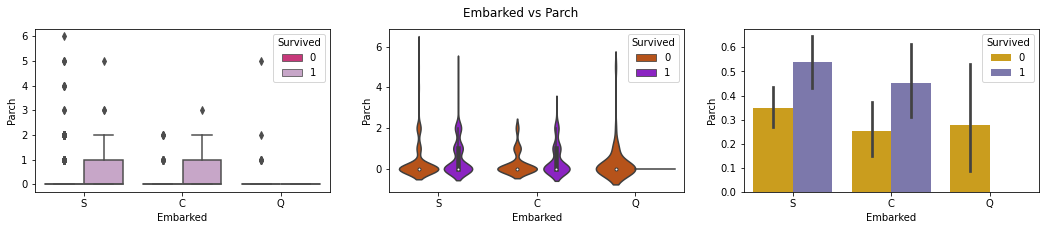

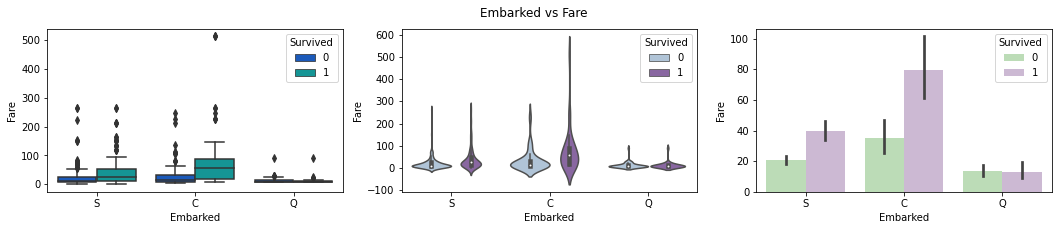

In [26]:
for col in cat_cols:
    if col == target_col:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(18,3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(
            data = df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(
            data=df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(
            data = df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.show()

In [27]:
df.drop(drop_cols, axis=1,inplace=True)

##### Missing Data

In [28]:
# Missing Data Identification
pd.isnull(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [29]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
100*pd.isnull(df).sum()/len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

Missing Data Strategy
- Identify Missing Data
- Discard the columns having too much of missing data (>25%)
- Treat/Impute the missing entries in columns
    - Try to fill fake entries which doesn't impact overall data
        - Fill using Mean Values (numerical data)
        - Fill using some imputers (categorical data)
- Discard the rows having missing entries, if the missing entries are too less (<5%)


<AxesSubplot:>

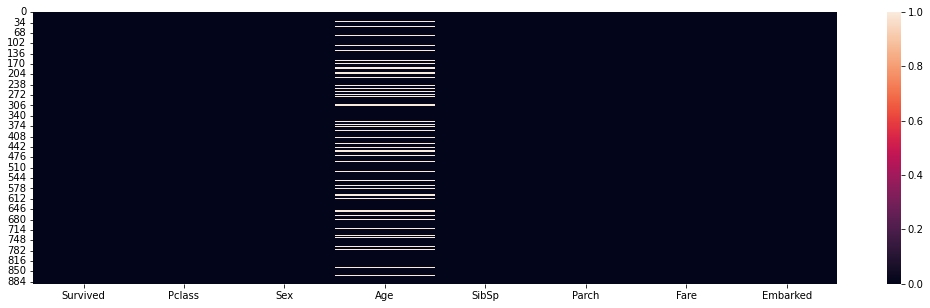

In [31]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

<AxesSubplot:>

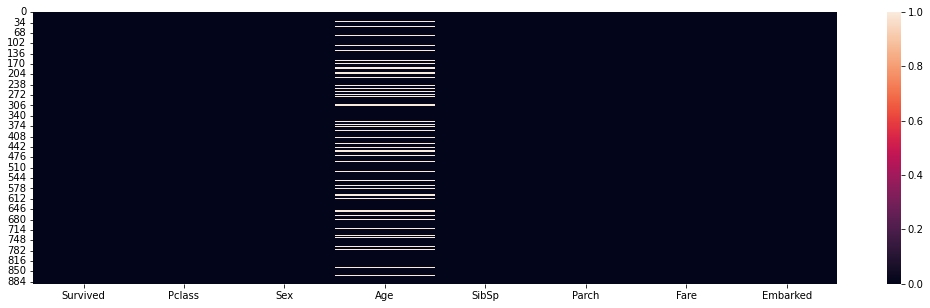

In [32]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [33]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

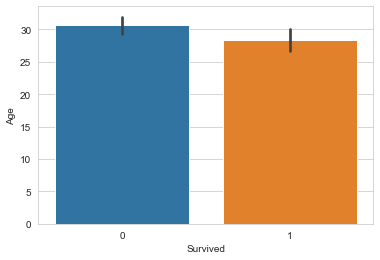

In [34]:
sns.barplot(data=df, x='Survived', y='Age')

In [35]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
df['Age'].mean()

29.69911764705882

In [37]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [38]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

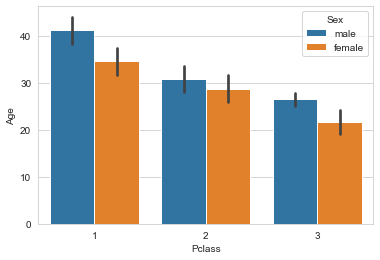

In [39]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
# Impute the fake entries in missing Age Information
def age_imputer(data):
    age = data['Age']
    pclass = data['Pclass']
    sex = data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age

df['Age'] = df.apply(age_imputer, axis = 1)
    

<AxesSubplot:>

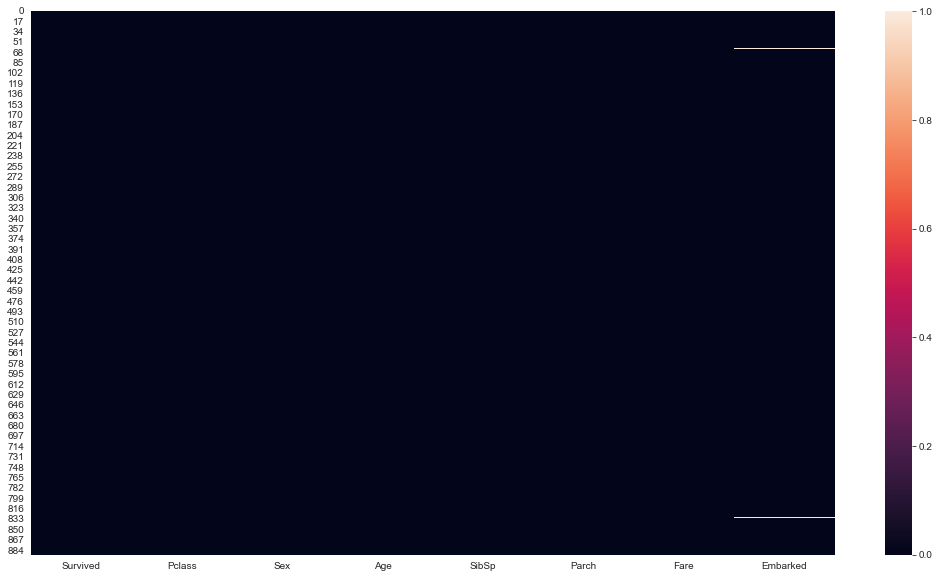

In [42]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [43]:
# Dropping missing entries which were very less (in Embarked Column)
df.dropna(inplace=True)

<AxesSubplot:>

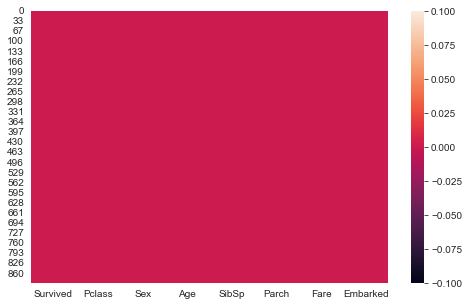

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.isnull(df))

In [45]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


String Data Preprocessing / Creating Dummy for String

In [47]:
data = pd.get_dummies(df).drop('Sex_female',axis=1)

In [48]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


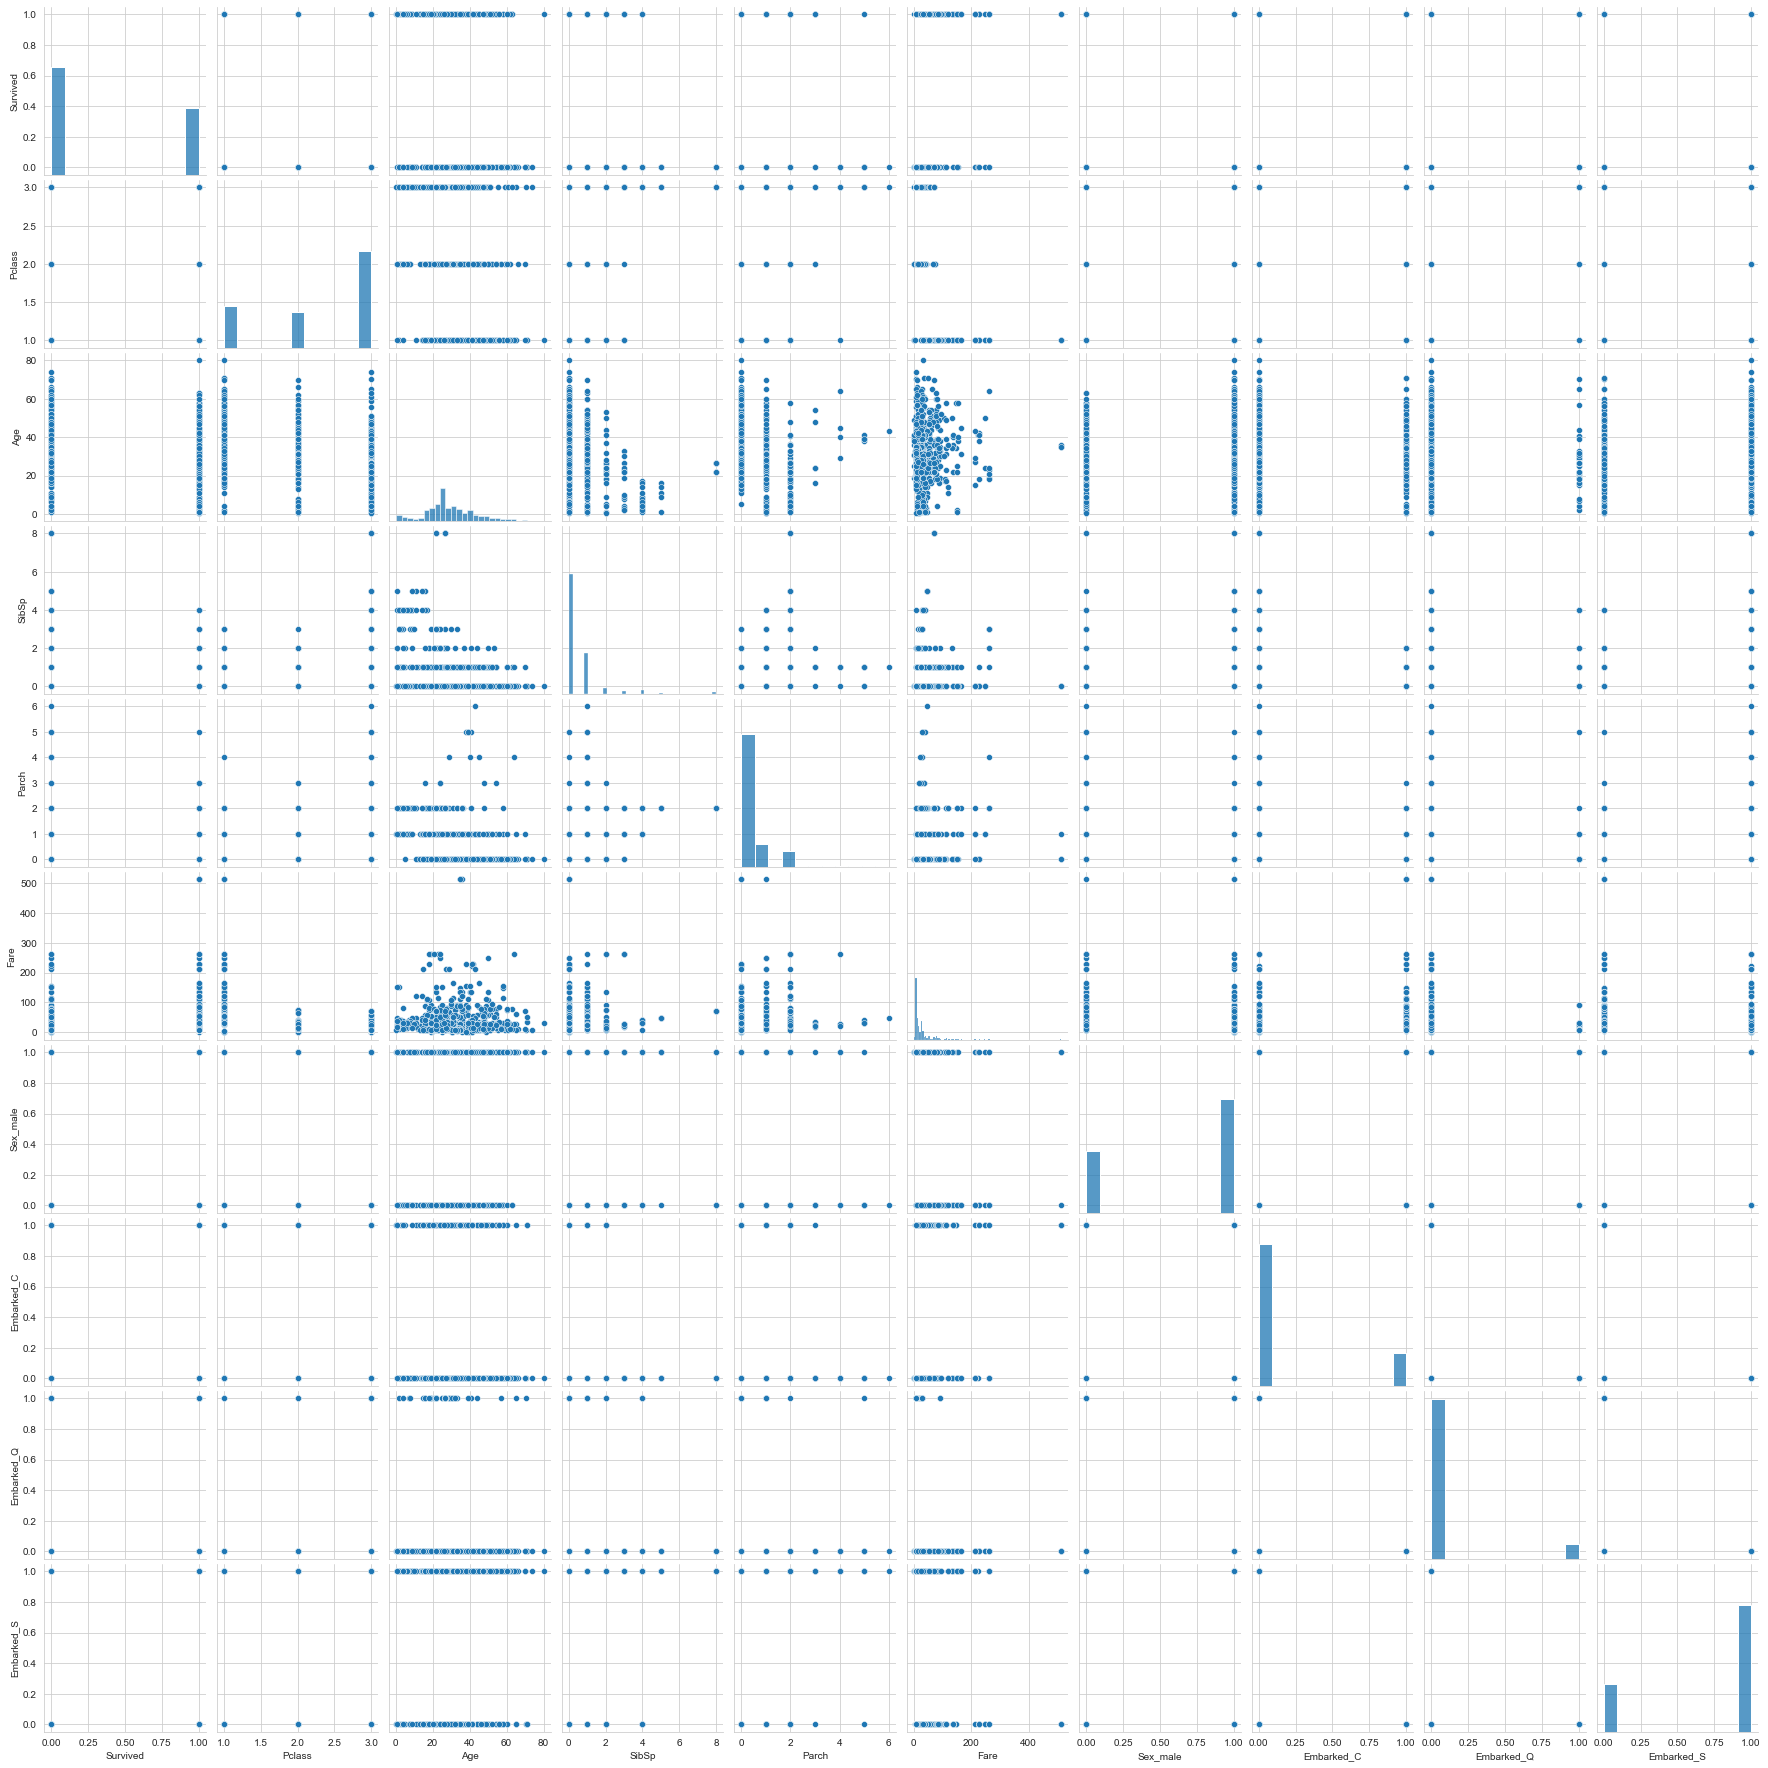

In [49]:
sns.pairplot(data)

In [50]:
target = data[target_col]
features = data.drop(target_col, axis=1)

In [51]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [52]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


Why we decided Logistic Regression?
1. Initially we thought of doing with Pairplot, but since its a categorical data in target, its not helpful
2. Since its <b style="color:yellow;">binary categorical target</b> and Features are mixtures of <b style="color:yellow;">numerical</b> and <b style="color:yellow;">categorical</b> both, then I can think of Logistic Regression (Classification)

# Machine Learning Template

#### Data Splitting 

In [53]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

#### Model Creation & Training

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

#### Model Evaluation

In [55]:
print(round(100 * model.score(xtest, ytest)),'%')

83 %


In [56]:
print(ytest.shape)
ytest.value_counts()

(223,)


0    136
1     87
Name: Survived, dtype: int64

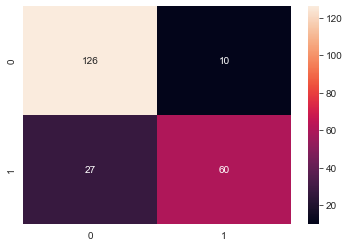

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [57]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot = True, fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))

In [58]:
pd.Series(ytest_pred).value_counts()

0    153
1     70
dtype: int64

# Improving the Model

1. By Balancing the Dataset
2. By Hyperparameter Tuning
3. Cross Validation

In [59]:
# Putting Class Weights/Hyperparam
model1 = LogisticRegression(class_weight = {0 : 0.9, 1 : 0.6}, random_state=101)
model1.fit(xtrain,ytrain)

print(classification_report(ytest,model1.predict(xtest)))


# This method did not work

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       136
           1       0.90      0.62      0.73        87

    accuracy                           0.83       223
   macro avg       0.85      0.79      0.80       223
weighted avg       0.84      0.83      0.82       223



In [60]:
# Hyperparam
for algo in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    print(algo)
    model_algo = LogisticRegression(random_state=101, solver = algo, tol = 1, C=1)
    model_algo.fit(xtrain,ytrain)
    print(classification_report(ytest,model_algo.predict(xtest)))

newton-cg
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

lbfgs
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

liblinear
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       136
           1       0.75      0.34      0.47        87

    accuracy                           0.70       223
   macro avg       0.72      0.64      0.63       223
weighted avg       0.71      0.70      0.67     

In [61]:
# This model is not really improving so we should not consider it as the score was low as compared to
# criticalness of the situation.

# Decision Tree Algorithm

In [62]:
xtrain,xtest,ytrain,ytest

(     Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_C  \
 127       3  24.000000      0      0   7.1417         1           0   
 133       2  29.000000      1      0  26.0000         0           0   
 619       2  26.000000      0      0  10.5000         1           0   
 439       2  31.000000      0      0  10.5000         1           0   
 374       3   3.000000      3      1  21.0750         0           0   
 ..      ...        ...    ...    ...      ...       ...         ...   
 576       2  34.000000      0      0  13.0000         0           0   
 840       3  20.000000      0      0   7.9250         1           0   
 338       3  45.000000      0      0   8.0500         1           0   
 524       3  26.507589      0      0   7.2292         1           1   
 865       2  42.000000      0      0  13.0000         0           0   
 
      Embarked_Q  Embarked_S  
 127           0           1  
 133           0           1  
 619           0           1  
 439      

In [63]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
print(classification_report(ytest, model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       136
           1       0.68      0.69      0.69        87

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [64]:
pd.DataFrame(model_dt.feature_importances_, index = xtrain.columns, columns=['Importance']).\
    sort_values(by='Importance', ascending=False)

,Importance
Sex_male,0.298897
Age,0.243117
Fare,0.236327
Pclass,0.104358
SibSp,0.066484
Parch,0.025715
Embarked_S,0.015132
Embarked_C,0.008678
Embarked_Q,0.001294


In [65]:
imp_cols = ['Sex_male','Fare','Age']

In [66]:
model_dt2 = DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest, model_dt2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       136
           1       0.62      0.67      0.64        87

    accuracy                           0.71       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.71      0.71       223



In [67]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(xtrain, ytrain)
print(classification_report(ytest, model_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       136
           1       0.78      0.75      0.76        87

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [68]:
pd.DataFrame(model_rf.feature_importances_, index = xtrain.columns, columns=['Importance']).\
    sort_values(by='Importance', ascending=False)

,Importance
Fare,0.277886
Age,0.262759
Sex_male,0.250007
Pclass,0.085565
Parch,0.042233
SibSp,0.042058
Embarked_S,0.016616
Embarked_C,0.013692
Embarked_Q,0.009184


In [69]:
model_rf2 = RandomForestClassifier().fit(xtrain[imp_cols], ytrain)
print(classification_report(ytest, model_rf2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       136
           1       0.75      0.67      0.71        87

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



* After applying various Algorithms, It observed that the best score is around ~83% with Logisitc Regression Only.
* Also Random Forest Model can be used if we want less number of parameters

In [71]:
pd.to_pickle(model_rf2, 'SurvivalPredictionRF.pickle')
pd.to_pickle(model, 'SurvivalPredictionLogisticR.pickle')

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV